In [1]:
import pyspark
sc = pyspark.SparkContext('local[*]')

# do something to prove it works
rdd = sc.parallelize(range(1000))
rdd.takeSample(False, 5)

[117, 494, 103, 213, 72]

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns

print('Modules are imported.')

Modules are imported.


In [3]:
spark = SparkSession.builder.appName("Covid19Analysis").getOrCreate()

covid_data = spark.read.csv('part-00000-d15c0132-834c-4976-ad28-7286de542a86-c000.csv', header=True, inferSchema=True)

In [4]:
# Perform necessary data transformations
covid_data = covid_data.withColumn("year", F.year("date"))
covid_data = covid_data.withColumn("month", F.month("date"))

# Filter data for the year 2020
covid_data_2020 = covid_data.filter(covid_data.year == 2020)

# Calculate total confirmed cases by country and month for the year 2020
total_confirmed_2020_monthly = covid_data_2020.groupBy("country", "month").agg(F.sum("confirmed").alias("total_confirmed"))

# Order the result by country and month
total_confirmed_2020_monthly = total_confirmed_2020_monthly.orderBy("country", "month")

# Show the result
total_confirmed_2020_monthly.show()

+-----------+-----+---------------+
|    country|month|total_confirmed|
+-----------+-----+---------------+
|afghanistan|    1|              0|
|afghanistan|    2|             30|
|afghanistan|    3|           1141|
|afghanistan|    4|          25152|
|afghanistan|    5|         222720|
|afghanistan|    6|         751685|
|afghanistan|    7|        1079412|
|afghanistan|    8|        1165099|
|afghanistan|    9|        1166401|
|afghanistan|   10|        1246695|
|afghanistan|   11|        1303865|
|afghanistan|   12|        1539551|
|    albania|    1|              0|
|    albania|    2|              0|
|    albania|    3|           2232|
|    albania|    4|          15632|
|    albania|    5|          28873|
|    albania|    6|          50880|
|    albania|    7|         119660|
|    albania|    8|         230278|
+-----------+-----+---------------+
only showing top 20 rows



In [5]:
pandas_df = total_confirmed_2020_monthly.toPandas()

In [6]:
pandas_df.head()

,country,month,total_confirmed
0,afghanistan,1,0
1,afghanistan,2,30
2,afghanistan,3,1141
3,afghanistan,4,25152
4,afghanistan,5,222720


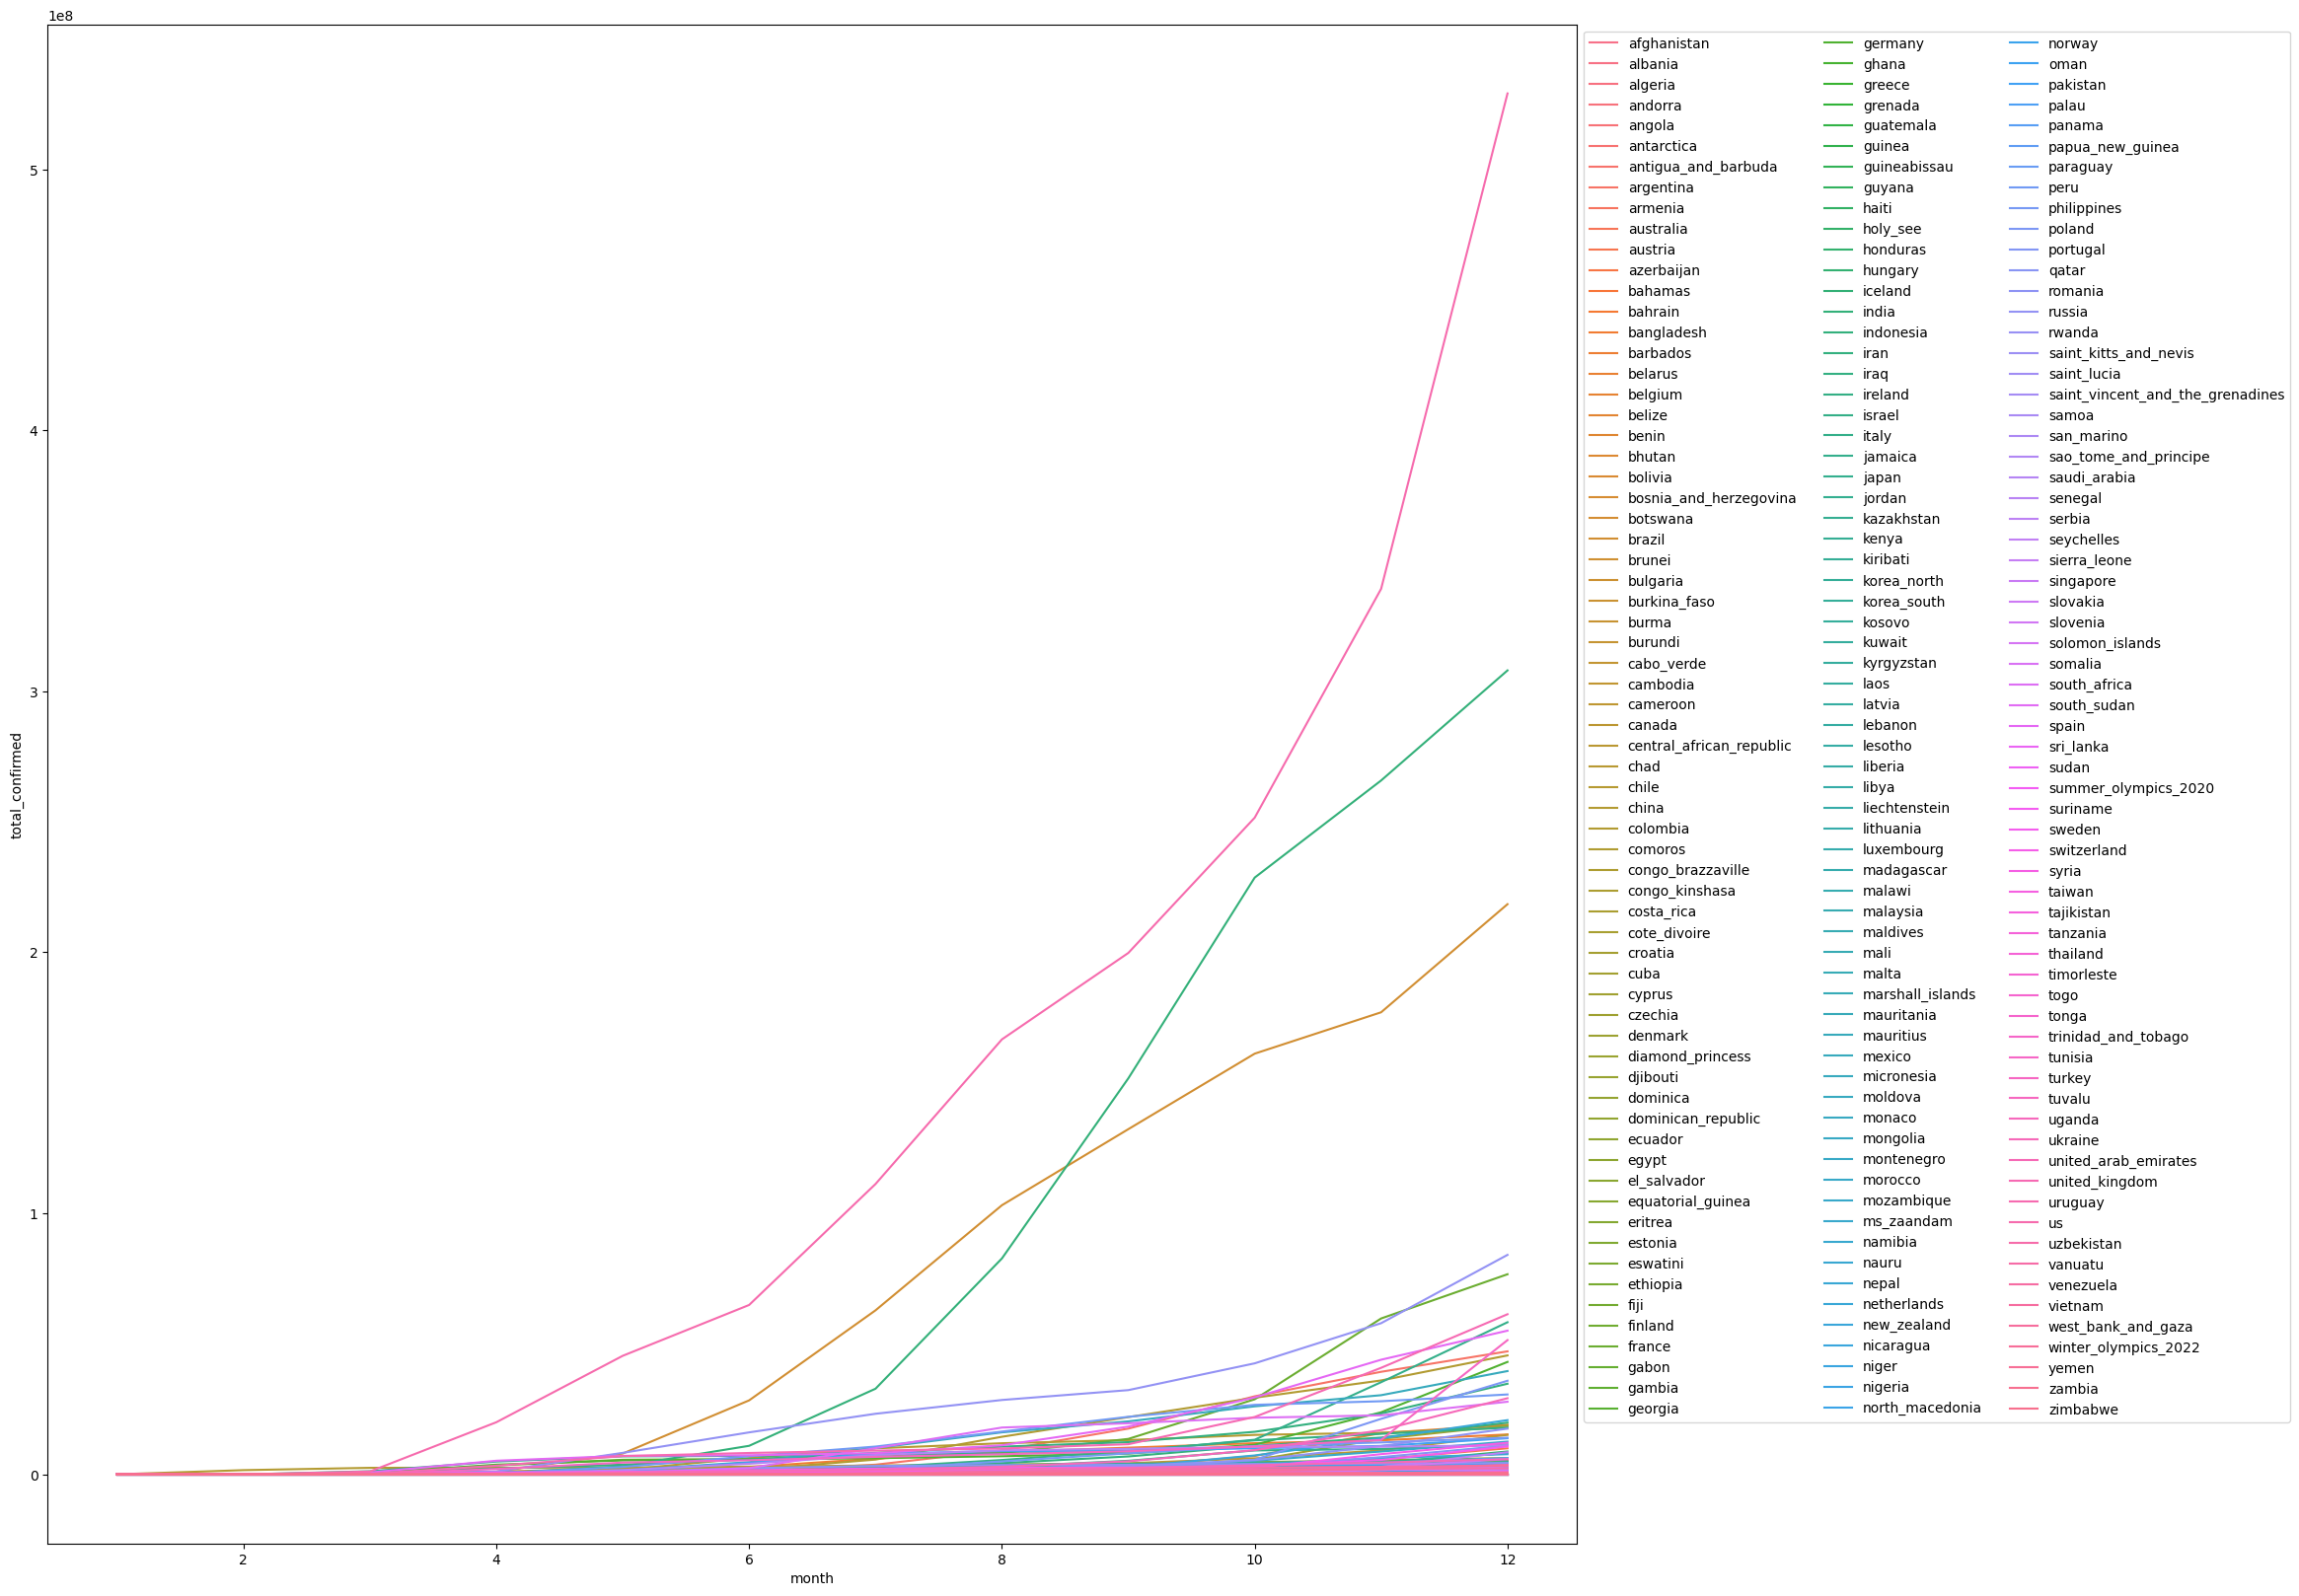

In [7]:
plt.figure(figsize=(20,20))
sns.lineplot(data=pandas_df, x='month', y='total_confirmed', hue='country', markers=True, dashes=False)
plt.legend(ncol=3, bbox_to_anchor=(1,1))
plt.show()

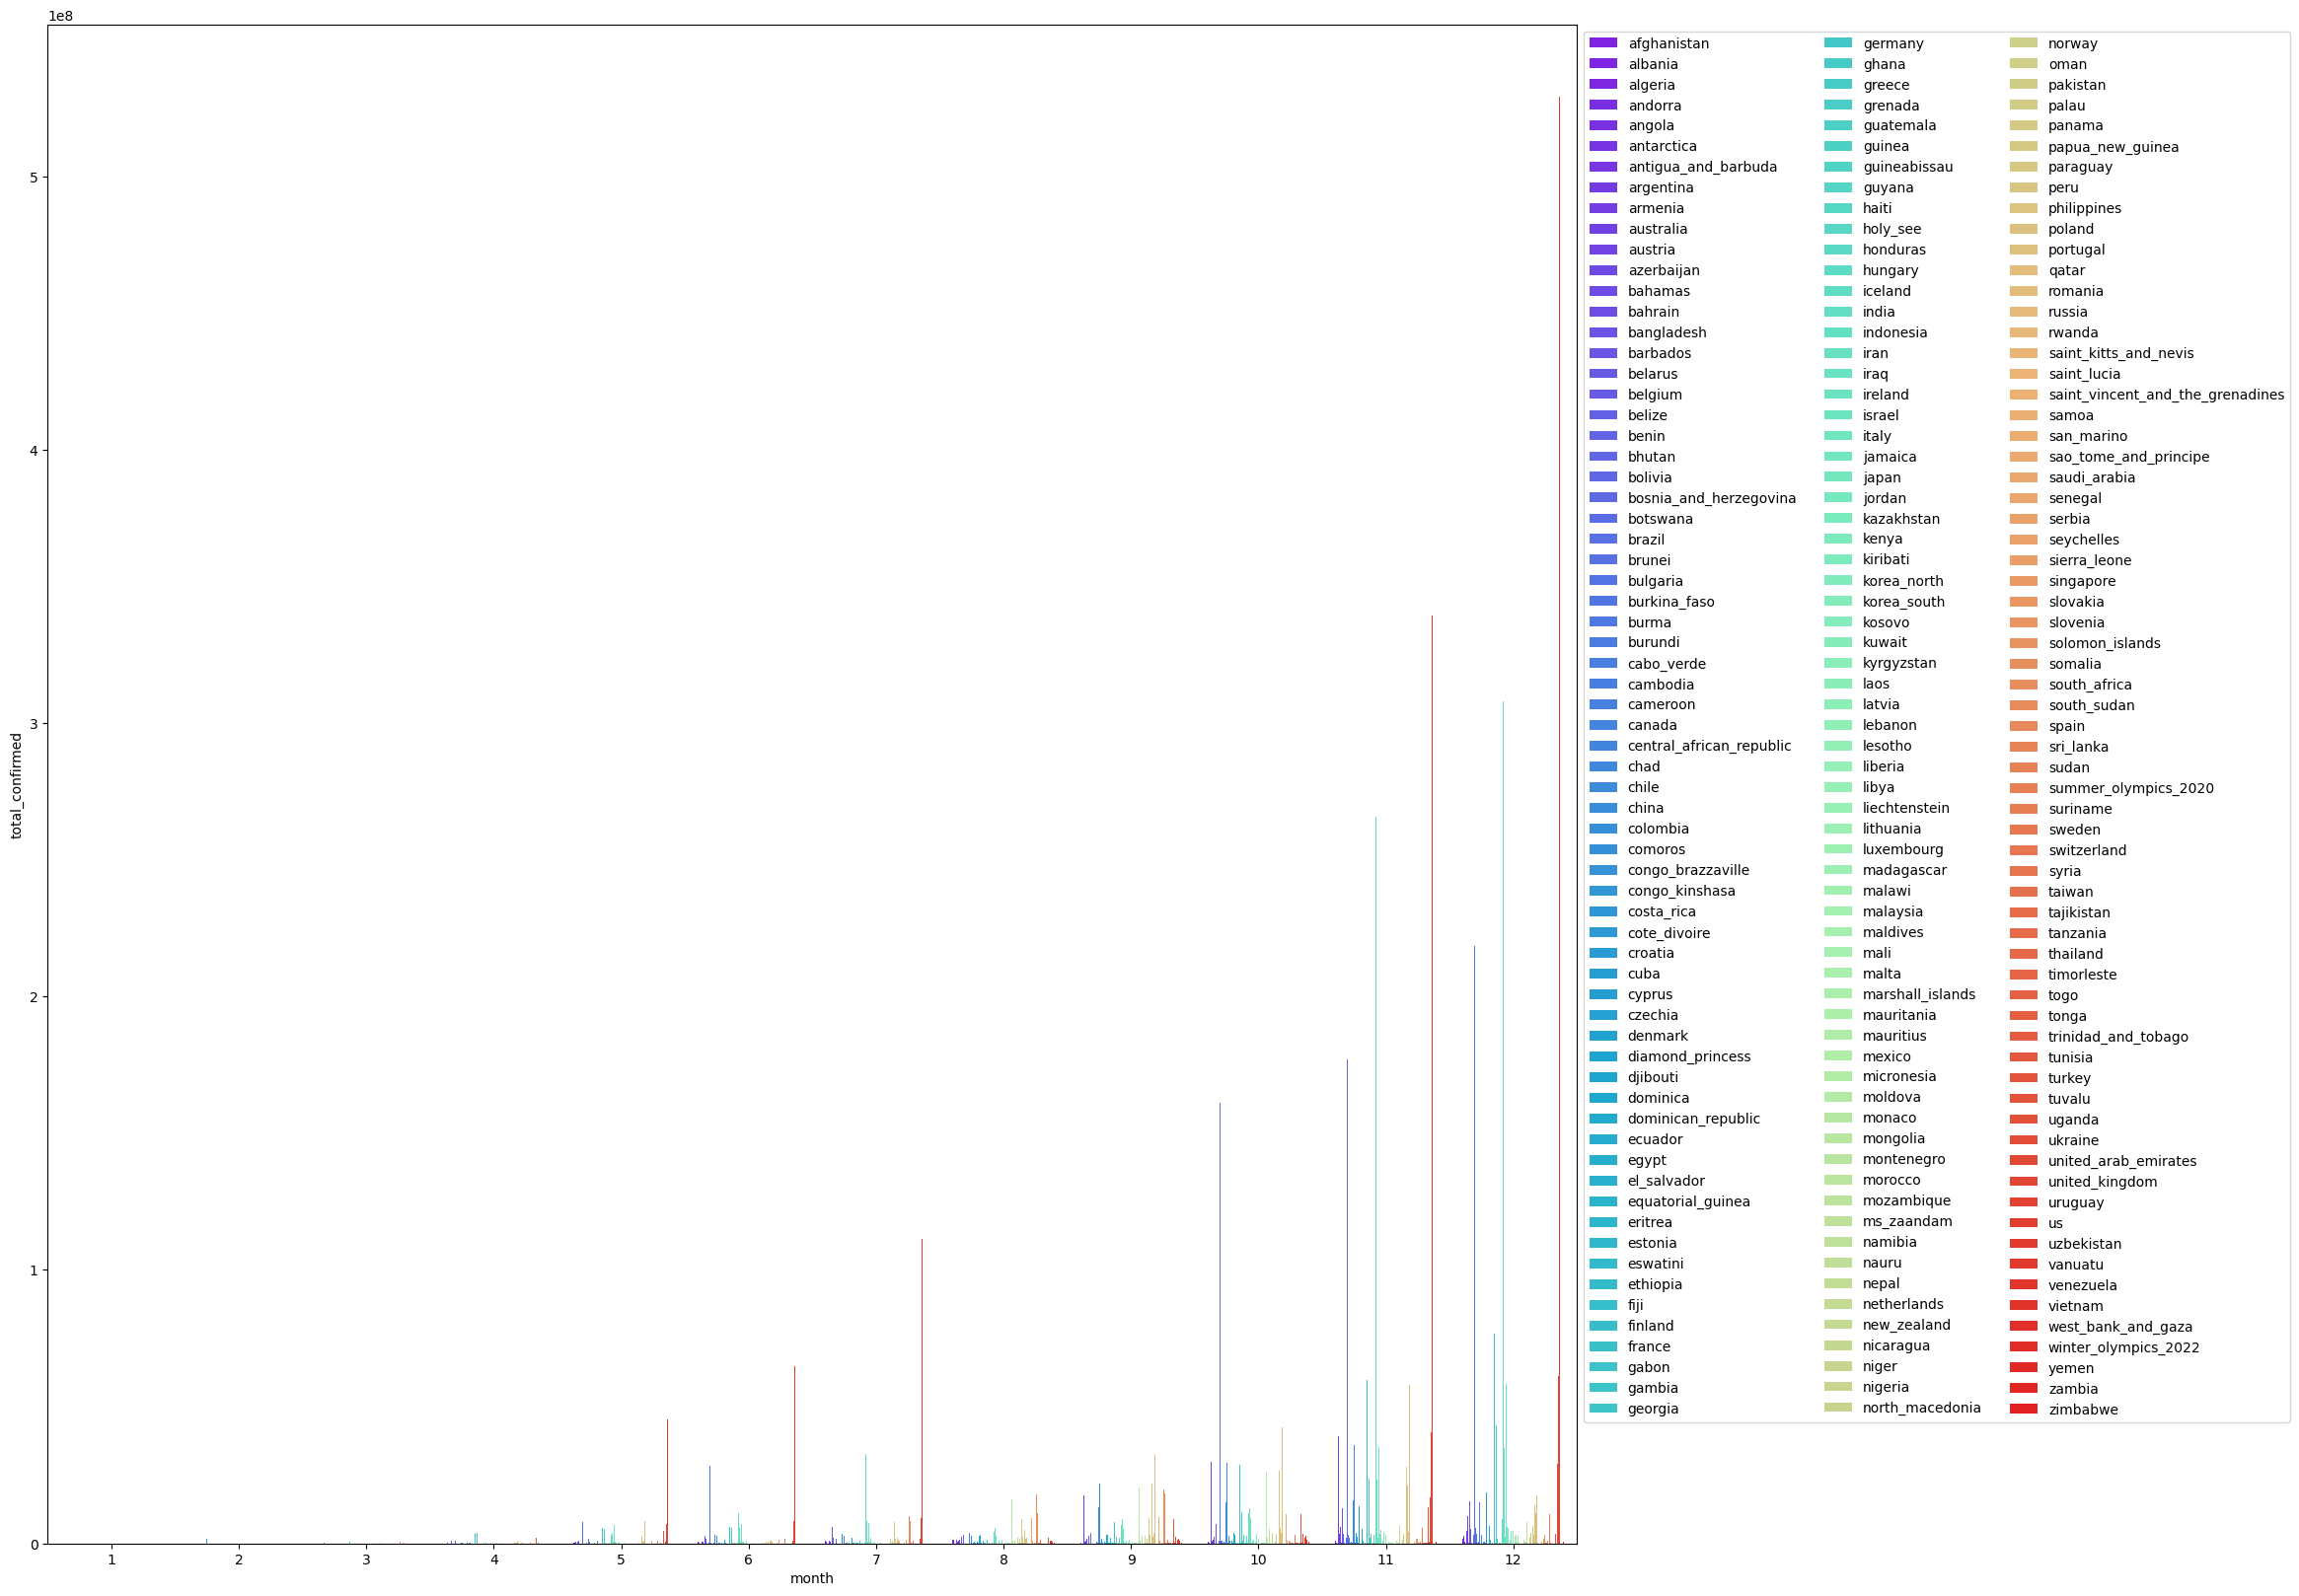

In [8]:
plt.figure(figsize=(20,20))
# Create a bar plot
sns.barplot(data=pandas_df, x='month', y='total_confirmed', hue='country', palette='rainbow')
plt.legend(ncol=3, bbox_to_anchor=(1,1))
# Show the plot
plt.show()